In [3]:
#Load some packages and add workers
using Images
using Distributed

using LinearAlgebra
using Statistics

In [5]:
#Load the package on all workers
addprocs(4)
@everywhere using DPMMSubClusters

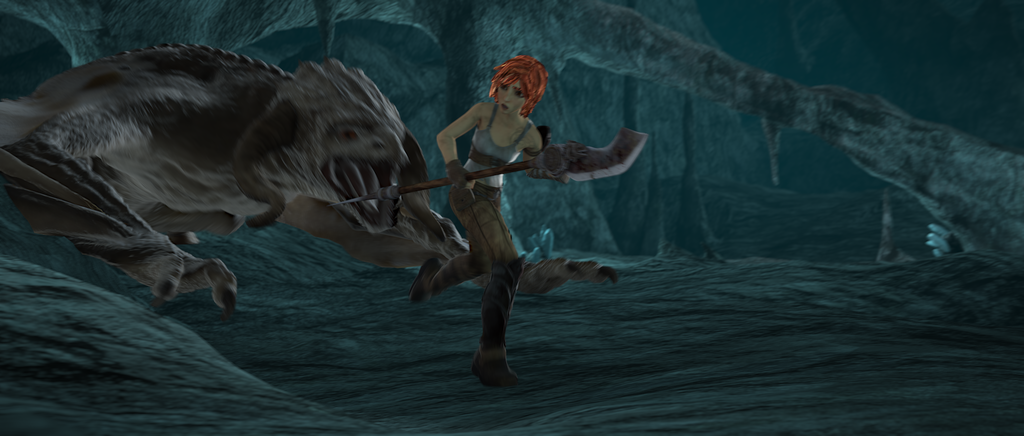

In [8]:
#Load image, taken from SINTEL http://sintel.is.tue.mpg.de/
img = load("frame_0001.png")

In [9]:
#Change to channel view
img_channels = channelview(img)
z,x,y = size(img_channels)

(3, 436, 1024)

In [10]:
#Create input
input_arr = zeros(5,x*y)
for i=1:x
    for j=1:y
        input_arr[:,(i-1)*y+j]=[img_channels[1,i,j],img_channels[2,i,j],img_channels[3,i,j],i,j]
    end
end

In [11]:
#Create HyperParams
#The rgb,xy multiplier allows us to both play with the weight of the xy/rgb
rgb_prior_multiplier = 30.0
xy_prior_multiplier = 1.0

data_cov = cov(input_arr')
data_cov[4:5,1:3] .= 0
data_cov[1:3,4:5] .= 0

data_cov[1:3,1:3] .*= rgb_prior_multiplier
data_cov[4:5,4:5] .*= xy_prior_multiplier

data_mean = mean(input_arr,dims = 2)[:]

hyper_params = DPMMSubClusters.niw_hyperparams(1.0,
           data_mean,
           8,
           data_cov)

DPMMSubClusters.niw_hyperparams(1.0f0, Float32[0.10742735, 0.17671652, 0.18514434, 218.5, 512.5], 8.0f0, Float32[0.11475264 0.08273591 … 0.0 0.0; 0.08273591 0.11883843 … 0.0 0.0; … ; 0.0 0.0 … 15841.285 0.0; 0.0 0.0 … 0.0 87381.445])

In [14]:
#Run the model
labels,clusters,weights = DPMMSubClusters.fit(input_arr,hyper_params,1.0,iters = 300, verbose = true)

Loading and distributing data:
  0.005793 seconds (1.22 k allocations: 8.572 MiB)
Node Leaders:
Dict{Any,Any}(2 => Any[2, 3, 4, 5, 6, 7, 8, 9])
Iteration: 1 || Clusters count: 1 || Log posterior: -2.94030621042512e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.07701611518859863 || Total time:0.07701611518859863
Iteration: 2 || Clusters count: 1 || Log posterior: -2.94030621042512e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.08147692680358887 || Total time:0.1584930419921875
Iteration: 3 || Clusters count: 1 || Log posterior: -2.94030621042512e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.07693290710449219 || Total time:0.2354259490966797
Iteration: 4 || Clusters count: 1 || Log posterior: -2.94030621042512e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.07924199104309082 || Total time:0.3146679401397705
Iteration: 5 || Clusters count: 1 || Log posterior: -2.94030621042512e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.07328391075134277 || 

Iteration: 47 || Clusters count: 4 || Log posterior: -2.11828393929432e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.10605192184448242 || Total time:4.171282529830933
Iteration: 48 || Clusters count: 4 || Log posterior: -2.118084934603434e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.10657095909118652 || Total time:4.277853488922119
Iteration: 49 || Clusters count: 4 || Log posterior: -2.1180476747693834e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.11624312400817871 || Total time:4.394096612930298
Iteration: 50 || Clusters count: 4 || Log posterior: -2.1181455573742203e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.12472414970397949 || Total time:4.518820762634277
Iteration: 51 || Clusters count: 4 || Log posterior: -2.1182880160867986e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.09134602546691895 || Total time:4.610166788101196
Iteration: 52 || Clusters count: 4 || Log posterior: -2.1185766340176873e6 || Vi score: no gt || NMI score: 

Iteration: 93 || Clusters count: 14 || Log posterior: -1.7454810647675805e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.18200087547302246 || Total time:10.789080619812012
Iteration: 94 || Clusters count: 14 || Log posterior: -1.7438572659344487e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.18517708778381348 || Total time:10.974257707595825
Iteration: 95 || Clusters count: 14 || Log posterior: -1.7420037774770078e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.1880779266357422 || Total time:11.162335634231567
Iteration: 96 || Clusters count: 14 || Log posterior: -1.738403822297317e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.2765669822692871 || Total time:11.438902616500854
Iteration: 97 || Clusters count: 14 || Log posterior: -1.7349330810713586e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.21088790893554688 || Total time:11.649790525436401
Iteration: 98 || Clusters count: 14 || Log posterior: -1.7314633156678495e6 || Vi score: no gt || 

Iteration: 139 || Clusters count: 24 || Log posterior: -1.6655695465982952e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.32305097579956055 || Total time:23.625345945358276
Iteration: 140 || Clusters count: 24 || Log posterior: -1.6650935106271326e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.2747519016265869 || Total time:23.900097846984863
Iteration: 141 || Clusters count: 24 || Log posterior: -1.6657128600323023e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.31745290756225586 || Total time:24.21755075454712
Iteration: 142 || Clusters count: 24 || Log posterior: -1.6650246801456031e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.25440311431884766 || Total time:24.471953868865967
Iteration: 143 || Clusters count: 24 || Log posterior: -1.6650183616154017e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.33341121673583984 || Total time:24.805365085601807
Iteration: 144 || Clusters count: 25 || Log posterior: -1.6647140063378622e6 || Vi score: no

Iteration: 185 || Clusters count: 26 || Log posterior: -1.6505934528971745e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.41709208488464355 || Total time:38.74788165092468
Iteration: 186 || Clusters count: 26 || Log posterior: -1.6504939520764141e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.4523758888244629 || Total time:39.200257539749146
Iteration: 187 || Clusters count: 26 || Log posterior: -1.6506793597389273e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.3771839141845703 || Total time:39.577441453933716
Iteration: 188 || Clusters count: 26 || Log posterior: -1.6507253251942215e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.34453415870666504 || Total time:39.92197561264038
Iteration: 189 || Clusters count: 26 || Log posterior: -1.6506406823916251e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.3258509635925293 || Total time:40.24782657623291
Iteration: 190 || Clusters count: 26 || Log posterior: -1.6503747768908555e6 || Vi score: no gt 

Iteration: 231 || Clusters count: 26 || Log posterior: -1.6490488479862027e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.27440810203552246 || Total time:54.61665320396423
Iteration: 232 || Clusters count: 26 || Log posterior: -1.6489385716855335e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.3512840270996094 || Total time:54.96793723106384
Iteration: 233 || Clusters count: 26 || Log posterior: -1.6500339604804327e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.3251688480377197 || Total time:55.29310607910156
Iteration: 234 || Clusters count: 26 || Log posterior: -1.6490434085939939e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.3230600357055664 || Total time:55.61616611480713
Iteration: 235 || Clusters count: 26 || Log posterior: -1.6493592689890673e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.35462212562561035 || Total time:55.97078824043274
Iteration: 236 || Clusters count: 26 || Log posterior: -1.6494289398140726e6 || Vi score: no gt ||

Iteration: 277 || Clusters count: 26 || Log posterior: -1.6487075564520173e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.3461740016937256 || Total time:69.86785507202148
Iteration: 278 || Clusters count: 26 || Log posterior: -1.6491637507877164e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.27666187286376953 || Total time:70.14451694488525
Iteration: 279 || Clusters count: 26 || Log posterior: -1.6491107889609162e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.3628249168395996 || Total time:70.50734186172485
Iteration: 280 || Clusters count: 26 || Log posterior: -1.6488833370520878e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.311276912689209 || Total time:70.81861877441406
Iteration: 281 || Clusters count: 26 || Log posterior: -1.649273886126023e6 || Vi score: no gt || NMI score: no gt || Iter Time:0.34548115730285645 || Total time:71.16409993171692
Iteration: 282 || Clusters count: 26 || Log posterior: -1.648991621457915e6 || Vi score: no gt || NM

([26, 26, 26, 26, 26, 26, 26, 26, 26, 26  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], DPMMSubClusters.mv_gaussian[DPMMSubClusters.mv_gaussian(Float32[0.08791604, 0.15855435, 0.16756245, 348.6046, 605.56934], Float32[0.00059554446 0.0009552731 … -0.054339442 -0.14335035; 0.0009552731 0.0015952496 … -0.40924647 -0.67706734; … ; -0.054339442 -0.40924647 … 2656.4346 2909.5305; -0.14335035 -0.67706734 … 2909.5305 56099.797], Float32[110213.445 -84754.97 … -7.719583 -0.104402415; -84754.97 270770.88 … 1.2206929 -0.109386705; … ; -7.719583 1.2206929 … 0.0010674179 -8.4442545e-6; -0.104402415 -0.109386705 … -8.4442545e-6 1.919085e-5], -11.481257f0, [331.98409968497674 -255.29827008690847 … -0.02325286961458397 -0.00031448016071472144; 0.0 453.42436476541326 … -0.010400245163921715 -0.00041831220505142067; … ; 0.0 0.0 … 0.01997789222546669 -0.0010361229368419215; 0.0 0.0 … 0.0 0.00422201099338806]), DPMMSubClusters.mv_gaussian(Float32[0.14800808, 0.13678575, 0.10723315, 212.15039, 466.4791], Float32[0.00

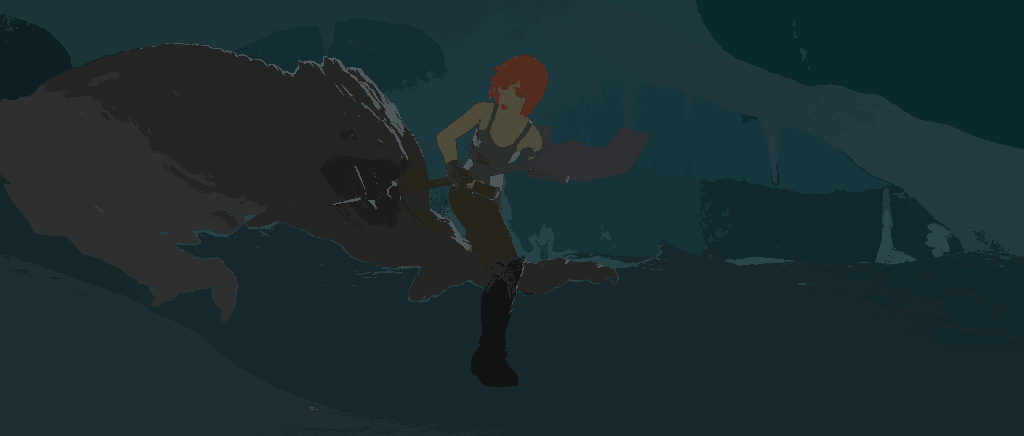

In [15]:
#Get the cluster color means
color_means = [x.μ[1:3] for x in clusters]

segemnated_image = zeros(3,x,y)
for i=1:x
    for j=1:y
        segemnated_image[:,i,j] = color_means[labels[(i-1)*y+j]]
    end
end
segemnated_image = colorview(RGB,segemnated_image)
